In [1]:
import numpy as np
import pandas as pd
import matplotlib
print matplotlib.__version__
matplotlib.use('PDF')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.lines as mlines
from glob import glob
from collections import Counter
import ns
import history_cmc as hic
import seaborn as sns
import math
import scipy
from scipy import stats
import matplotlib.cm as cm
import matplotlib as mpl
from random import shuffle
%matplotlib inline

twopi=2.*np.pi
yearsc=3.1557*10**7
figsave='/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/plots/'
Kconst=9.87*10**-48 ##yr/G^2
Gconst=6.674*10**-8 ##cm3*g-1*s-2
clight=3*10**10 ##cm/s
Msun=2*10**33 ##gram
AU=1.496*10**13  ##cm
PC=3.086*10**18  ##cm

1.5.1


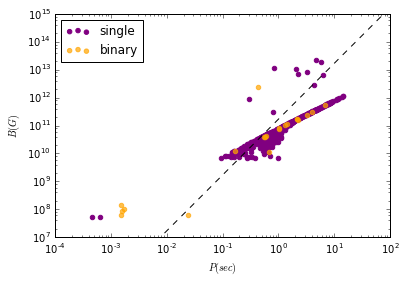

In [22]:
#Generate spin distribution and PP plot.

#sourcedir='/projects/b1011/sourav/new_runs/kick_grid/rv1/kickscale_1.0'
#sourcedir='/projects/b1011/syr904/cmc/cmc-mpi-09/rundir/kickgrid/kickgrid_0.19'
#sourcedir='/projects/b1011/syr904/cmc/cmc-mpi-06/rundir/8e5rv1fb5kick1.0'
sourcedir='/projects/b1011/kyle/cmc/newruns/rundir/N8e5rv1fb5w5_kickgrid/kickscale_0.18'

pref='initial'
filestr=sourcedir+'/'+pref
snaps=np.sort(glob(filestr+'.snap*.dat.gz'))
lastsnap=snaps[-1]
Bs, Bb, Ps, Pb=ns.get_snap_BP(lastsnap)

#Death Line
x=np.logspace(-4.0, 2.0, num=50)
#print x

#Ps=np.asarray(sispin); Pb=np.asarray(bispin); Bs=np.asarray(Bs); Bb=np.asarray(Bb); Bsi=np.asarray(Bsi); Bbi=np.asarray(Bbi); Psi=np.asarray(Psi); Pbi=np.asarray(Pbi)
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.plot(x, (x**2)*(0.17*10**12), 'k--')    #Deadline
#plt.plot(x, (4*10**8)*(x/(8.6*10**-4))**(7./6.), 'r--')
#plt.plot(x, x*0.07*10**12, 'b--')  #Artificial line
#plt.plot(x, x*0.15*10**12, 'g--')  #Artificial line
#plt.plot(x, x*0.04*10**12, 'r--')  #Artificial line
#plt.plot(x, 10**(1.81*np.log10(x)+6.9), 'k')   #Eq.(18)
#plt.plot(x, 10**(1.75*np.log10(x)-11.64), 'k.')   #Eq.(19)
#plt.scatter(Psi, Bsi, marker='.', color='k', label='15 Myr')
#plt.scatter(Pbi, Bbi, marker='.', color='k')
plt.scatter(Ps, Bs, color='purple', label='single')
plt.scatter(Pb, Bb, color='orange', label='binary', alpha=0.7)
plt.xlim(10**-4, 100.)
plt.ylim(10**7, 10**15)
plt.xlabel(r'$P(sec)$')
plt.ylabel(r'$B(G)$')
plt.legend(loc='upper left')

#plt.show()
#plt.savefig(figsave+'1e6kick1.pdf', dpi=300)

psr 1053184.0 566421.0 1313.0
psr 1053184.0 566421.0 1313.0
psr 1157225.0 1491567.0 1313.0
psr 608672.0 913949.0 1313.0
psr 927364.0 1256240.0 1413.0
psr 425957.0 1193614.0 1313.0
psr 425957.0 1193614.0 1313.0
psr 193234.0 1013784.0 1313.0
psr 193234.0 1013784.0 1313.0
psr 193234.0 1013784.0 1313.0
psr 193234.0 1013784.0 1313.0
psr 193234.0 1013784.0 1313.0
psr 193234.0 1013784.0 1313.0
psr 193234.0 1013784.0 1313.0
psr 193234.0 1013784.0 1313.0
psr 193234.0 1013784.0 1313.0
psr 193234.0 1013784.0 1313.0
psr 193234.0 1013784.0 1313.0
psr 193234.0 1013784.0 1313.0
psr 276459.0 1252301.0 1313.0
psr 193234.0 1013784.0 1313.0
psr 193234.0 1013784.0 1313.0
psr 276459.0 1252301.0 1313.0
psr 276459.0 1252301.0 1313.0
psr 276459.0 1252301.0 1313.0
psr 276459.0 1252301.0 1313.0
psr 988266.0 1087849.0 1313.0
psr 988266.0 1087849.0 1313.0
psr 101965.0 1205851.0 1313.0
psr 101965.0 1205851.0 1313.0
psr 101965.0 1205851.0 1313.0
psr 1134724.0 351563.0 1313.0
psr 859443.0 1262370.0 1313.0
psr 859443

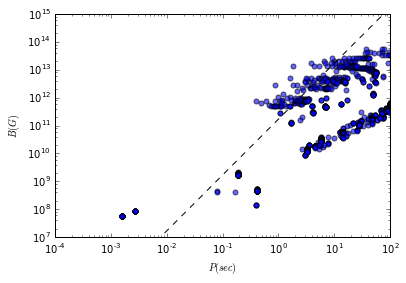

In [8]:
datansbh=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/DNS-NSBH.dat')
B0=datansbh[:,6]; B1=datansbh[:,7]; P0=datansbh[:,4]; P1=datansbh[:,5]
id0=datansbh[:,2]; id1=datansbh[:,3]; types=datansbh[:,12]

B=[]; P=[]; IDpsr_DNS=[]; IDmsp_DNS=[]; IDpsr_NSBH=[]; IDmsp_NSBH=[]
for i in range(len(B0)):
    if B0[i]>0 and B1[i]>0:
        B.append(B0[i])
        B.append(B1[i])
        P.append(P0[i])
        P.append(P1[i])
    if B0[i]>0 and P0[i]<=0.03: 
        print 'msp', id0[i], id1[i], types[i]
        if types[i]==1313:
            IDmsp_DNS.append(str(id0[i])+str(id1[i]))
        else:
            IDmsp_NSBH.append(str(id0[i])+str(id1[i]))
    if B1[i]>0 and P1[i]<=0.03: 
        print 'msp', id0[i], id1[i], types[i]
        if types[i]==1313:
            IDmsp_DNS.append(str(id0[i])+str(id1[i]))
        else:
            IDmsp_NSBH.append(str(id0[i])+str(id1[i]))
    
    
    if B0[i]>0 and B0[i]>=(P0[i]**2)*(0.17*10**12) and P0[i]>0.03: 
        print 'psr', id0[i], id1[i], types[i]
        if types[i]==1313:
            IDpsr_DNS.append(str(id0[i])+str(id1[i]))
        else:
            IDpsr_NSBH.append(str(id0[i])+str(id1[i]))
    if B1[i]>0 and B1[i]>=(P1[i]**2)*(0.17*10**12) and P1[i]>0.03: 
        print 'psr', id0[i], id1[i], types[i]
        if types[i]==1313:
            IDpsr_DNS.append(str(id0[i])+str(id1[i]))
        else:
            IDpsr_NSBH.append(str(id0[i])+str(id1[i]))

print Counter(IDmsp_DNS).keys() , len(Counter(IDmsp_DNS).keys())
print Counter(IDpsr_DNS).keys() , len(Counter(IDpsr_DNS).keys())
print Counter(IDmsp_NSBH).keys(), len(Counter(IDmsp_NSBH).keys())
print Counter(IDpsr_NSBH).keys(), len(Counter(IDpsr_NSBH).keys())
    

x=np.logspace(-4.0, 2.0, num=50)

plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.plot(x, (x**2)*(0.17*10**12), 'k--')    #Deadline
plt.scatter(P, B, s=25, alpha=0.6)
plt.xlim(10**-4, 100.)
plt.ylim(10**7, 10**15)
plt.xlabel(r'$P(sec)$')
plt.ylabel(r'$B(G)$')


[ 404.  404.  404. ...,    7.    7.    7.]
[  1.   1.   1. ...,  25.  25.  24.]
-0.737817931624 1.07147856134e-266


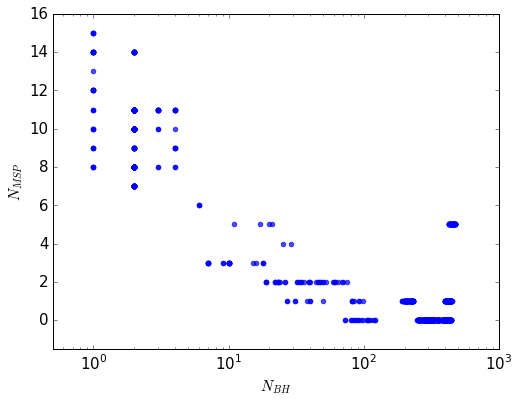

In [20]:
#pd.options.display.max_rows = 4000
data=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/nsnumber_10to12Gyr.dat')
nbh=np.array(data[:,2]); ntot=np.array(data[:,3]); nmsp=np.array(data[:,4])
mtot=np.array(data[:, 6]); modelno=np.array(data[:,0])
print nbh
print nmsp

rho, pval=scipy.stats.spearmanr(nbh, nmsp)
print rho, pval

matplotlib.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = [8, 6]
plt.figure()
plt.scatter(nbh, nmsp, color='b', marker='o', s=20, alpha=0.7)

plt.xlim(0.5,10**3)
plt.xscale('log')
plt.ylim(-1.5, 16)
plt.xlabel(r'$N_{BH}$')
plt.ylabel(r'$N_{MSP}$')
##plt.show()
#plt.savefig(figsave+'nbhnmsp_10to12Gyrextra.pdf', dpi=300)

In [2]:
def addColorbar(
    ax,cmap,
    vmin,vmax,
    label,logflag = 0,
    fontsize=16,cmap_number=0,
    tick_tuple=None):
    if logflag:
        from matplotlib.colors import LogNorm as norm
        ticks = np.linspace(np.log10(vmin),np.log10(vmax),5,endpoint=True)
        tick_labels= [r"$10^{%.1f}$"%tick for tick in ticks]
        ticks = 10**ticks
    else:
        from matplotlib.colors import Normalize as norm
        ticks = np.linspace(vmin,vmax,5,endpoint=True)
        tick_labels= ticks
    
    if tick_tuple is not None:
        ticks,tick_labels = tick_tuple

    fig = ax.get_figure()
    
    ## x,y of bottom left corner, width,height in percentage of figure size
    ## matches the default aspect ratio of matplotlib
    cur_size = fig.get_size_inches()*fig.dpi        

    cur_height = cur_size[1]
    cur_width = cur_size[0]
    offset = 0.00 + cmap_number*(25/cur_width+50/cur_width)

    ax1 = fig.add_axes([0.95 + offset, 0.125, 25./cur_width, 0.75])

    cb1 = matplotlib.colorbar.ColorbarBase(
        ax1, cmap=cmap,
        #extend='both',
        extendfrac=0.05,
        norm=norm(vmin=vmin,vmax=vmax),
        orientation='vertical')


    cb1.set_label(label,fontsize=fontsize)

    cb1.set_ticks(ticks)
    cb1.set_ticklabels(tick_labels)
    cb1.ax.tick_params(labelsize=fontsize-2)
    return cb1,ax1

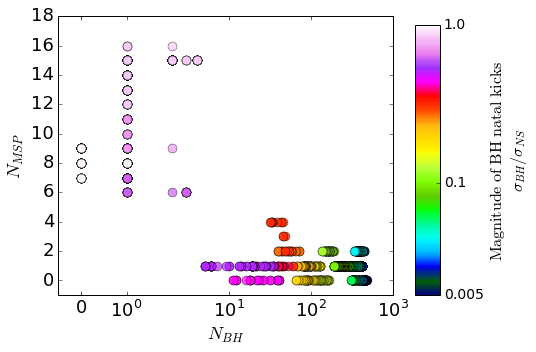

In [18]:
data=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/ns_number_9to12Gyr_newmodel.dat')
nbh=np.array(data[:,3]); ntot=np.array(data[:,4]); npsr=np.array(data[:,8]); nmsp=np.array(data[:,9])
mtot=np.array(data[:, 2]); modelno=np.array(data[:,0]); 
#print nbh, npsr

#plt.style.use('ggplot')

bdot = mlines.Line2D([], [],  linestyle = 'None', color='blue', marker='o',
                  markersize=7, label=r'$\rm{N=8e5}$')
rdot=mlines.Line2D([], [],  linestyle = 'None', color='r', marker='o',
                  markersize=7, label=r'$\rm{N=3.5e6}$')

matplotlib.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [6, 5]
c = cm.gist_ncar(np.linspace(0, 1, 25))
#c = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
#          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
#          '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000',
#          '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080',
#          'rosybrown', 'darkgrey']
#shuffle(c)
fig=plt.figure()
#bh=[]; psr=[]; msp=[]
for n in range(0,26):
    bh=[]; psr=[]; msp=[]
    for i in range(len(modelno)):
        #if modelno[i]==n: bh.append(nbh[i]/ntot[i]*6*10**5); psr.append(npsr[i]/ntot[i]*6*10**5); msp.append(nmsp[i]/ntot[i]*6*10**5)
        if modelno[i]==n: bh.append(nbh[i]); psr.append(npsr[i]); msp.append(nmsp[i])
    #print bh, msp
    bh=bh[::-1]; psr=psr[::-1]; msp=msp[::-1]
    #print msp
    if n<25:
        #plt.plot(bh, msp, 'o', color=c[n], markersize=8, alpha=0.7, markeredgecolor='k', markeredgewidth=0.6)
        plt.scatter(bh, msp, color=c[n], s=80, alpha=0.7, edgecolors='k', linewidth='0.5')
        
    #else:
        #plt.plot(bh, msp, '.', color='r', markersize=14, alpha=0.7)
        

    
ax = plt.gca()
addColorbar(ax, plt.get_cmap('gist_ncar'), 1, 25, label=r"$\rm{Magnitude\ of\ BH\ natal\ kicks}$"+"\n"+"$\sigma_{BH}/\sigma_{NS}$",tick_tuple=([1,11,25],['0.005','0.1','1.0']))
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
#ax.grid(False)
#ax.set_axis_bgcolor('w')
ax.set_xscale('symlog')
ax.set_xlim(-0.5, 1000)
ax.set_ylim(-1, 18)
#plt.xlabel(r'$N_{BH}(\times N^{-1} \times 6\times10^5)$')
#plt.ylabel(r'$N_{MSP}(\times N^{-1} \times 6\times10^5)$')
ax.set_xlabel(r'$N_{BH}$')
ax.set_ylabel(r'$N_{MSP}$')

#plt.legend(handles=[bdot, rdot], loc='best', prop={'size': 16}, numpoints=1, frameon=True)
#plt.show()
#plt.tight_layout()
plt.savefig(figsave+'nbhnmsp_9to12Gyr.pdf', dpi=300,bbox_inches='tight')
#print(plt.style.available)

1496 1496


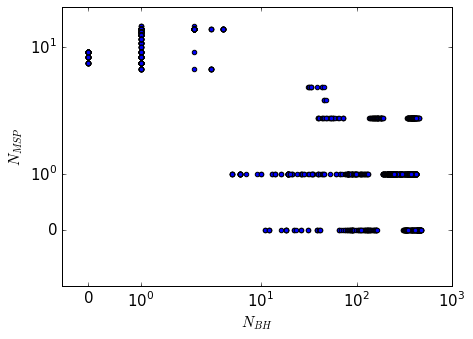

In [30]:
data=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/ns_number_9to12Gyr_newmodel.dat')
nbh=np.array(data[:,3]); ntot=np.array(data[:,4]); npsr=np.array(data[:,8]); nmsp=np.array(data[:,9])
mtot=np.array(data[:, 2]); modelno=np.array(data[:,0])
print len(nbh), len(nmsp)

plt.figure()
plt.scatter(nbh, nmsp)
plt.xscale('symlog')
plt.xlim(-0.5, 1000)
plt.ylim(-1, 25)
plt.xlabel(r'$N_{BH}$')
plt.ylabel(r'$N_{MSP}$')


729336 689053
382216 833021
602427 833410
424380 825413
522263 831695
467893 837101
602427 833410
802855 316469
703663 816385
733912 807845
484084 835323
484084 835323
703663 816385
700549 70293
484084 835323
156269 1223263
801829 179609
734749 -100
758752 -100
641481 1342769
138239 1012759
484084 835323
523114 149954
217394 -100
994514 1236208
244534 1185419
410442 1116787
119153 -100
973430 468730
274252 -100
1217740 694888
279982 752974
464601 1186539
120909 -100
1362190 -100
240676 894564
73016 407771
1054893 632229
58134 858760
1062948 -100
142206 -100
590707 1089864
585946 -100
897830 1013937
940630 620578
539605 -100
861638 -100
974797 844499
618382 60691
439412 1166651
857622 1332761
125924 110090
1496595 225017
212033 1087121
460517 1569592
426002 56473
505296 1007779
1037757 589733
85998 0
560956 90706
681272 -100
342981 -100
710320 1352405
1491428 841775
962597 725457
299045 763408
778283 673811


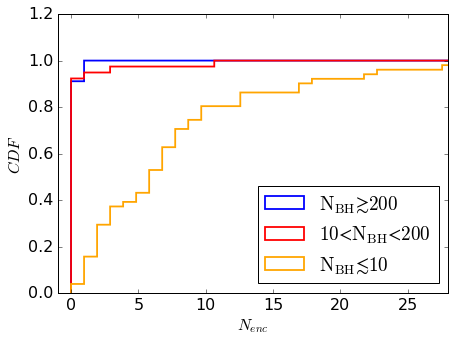

In [26]:
pathlist='/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/kickgrid_path.dat'
start=0
end=24

sourcedir=np.genfromtxt(pathlist, dtype=str)
enc_bhpoor=[]; enc_bhrich=[]; enc_bhmid=[]
for i in range(start, end):
    pref='initial'
    filestr=sourcedir[i]+'/'+pref
    snaps=np.sort(glob(filestr+'.snap*.dat.gz'))
    lastsnap=snaps[-1]
    Npulsar, Nmsp, Nmtb, MSPid, Comid=ns.get_snap_Nns(lastsnap)
    
    for j in range(len(MSPid)):
        #print MSPid[j]
        history=hic.history_maker([MSPid[j]], [1], 'initial', sourcedir[i], 1.0)
        intact_num=len(history[MSPid[j]]['binint']['binint'])
        if i<11: enc_bhrich.append(intact_num)
        elif i<18: enc_bhmid.append(intact_num)
        else: enc_bhpoor.append(intact_num)
            
    #print i

#print len(enc_bhrich), len(enc_bhpoor), len(enc_bhmid)
enc_bhrich=np.pad(enc_bhrich, (0, 37), 'constant')
enc_bhmid=np.pad(enc_bhmid, (0, 31), 'constant')
#print len(enc_bhrich), len(enc_bhpoor), len(enc_bhmid)
weights_bhrich= np.ones_like(enc_bhrich)/float(len(enc_bhrich))
weights_bhpoor= np.ones_like(enc_bhpoor)/float(len(enc_bhpoor))
weights_bhmid= np.ones_like(enc_bhmid)/float(len(enc_bhmid))

matplotlib.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [7, 5]
plt.figure()
plt.hist(enc_bhrich, bins=60, histtype='step', lw=1.8, color='b', weights=weights_bhrich, cumulative=True, range=(0.0, max(enc_bhpoor)), label=r'$\rm{N_{BH} \gtrsim 200}$')
plt.hist(enc_bhmid, bins=60, histtype='step', lw=1.8, color='r', weights=weights_bhmid, cumulative=True, range=(0.0, max(enc_bhpoor)), label=r'$\rm{10 \less N_{BH} \less 200}$')
plt.hist(enc_bhpoor, bins=60, histtype='step', lw=1.8,color='orange', weights=weights_bhpoor, cumulative=True, range=(0.0, max(enc_bhpoor)), label=r'$\rm{N_{BH} \lesssim 10}$')
plt.ylim(0.0, 1.2)
plt.xlim(-1., 28.)
plt.ylabel(r'$CDF$')
plt.xlabel(r'$N_{enc}$')
plt.legend(loc='lower right')
#plt.show()
#plt.savefig('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/encounter_cdf.pdf', dpi=300)

#plt.figure()
#values_rich, base_rich = np.histogram(enc_bhrich)
#cumulative_rich = np.cumsum(values_rich)
#plt.plot(base_rich[:-1], cumulative_rich)
#values_mid, base_mid = np.histogram(enc_bhmid)
#cumulative_mid = np.cumsum(values_mid)
#plt.plot(base_mid[:-1], cumulative_mid)
#values_poor, base_poor = np.histogram(enc_bhpoor)
#cumulative_poor = np.cumsum(values_poor)
#plt.plot(base_poor[:-1], cumulative_poor)
#plt.ylim(0.0, 1.2)
#plt.ylabel(r'$Probability Density$')
#plt.xlabel(r'$N_{encounter}$')
#plt.legend(loc='upper right')
##plt.show()
#plt.savefig('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/plots/encounter_cdf_alter.pdf', dpi=300)



102.0


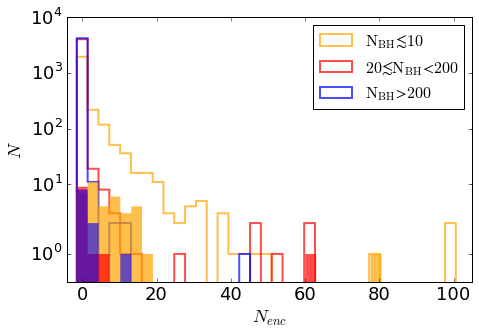

In [45]:
encns_bhpoor=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/enc_bhpoor_new.dat')
encns_bhmid=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/enc_bhmid_new.dat')
encns_bhrich=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/enc_bhrich_new.dat')
#encns_35e5=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/enc_bhpoor_26.dat')
enc_msp=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/enc_msp.dat')

model=enc_msp[:,0]; nenc=enc_msp[:,3]

##Including model 3.5e6
#encns_bhmid=list(encns_bhmid)+list(encns_35e5)

print max(encns_bhpoor)

mspenc_bhpoor=[]; mspenc_bhmid=[]; mspenc_bhrich=[]
for k in range(len(model)):
    if model[k]<10:
        mspenc_bhrich.append(nenc[k])
    elif model[k]<19:
        mspenc_bhmid.append(nenc[k])
    elif model[k]<25:
        mspenc_bhpoor.append(nenc[k])
    #else:
        #r2d_bhmid.append(R2D[j])

#enc_bhrich=np.pad(enc_bhrich, (0, 37), 'constant')
#enc_bhmid=np.pad(enc_bhmid, (0, 31), 'constant')
#print len(enc_bhrich), len(enc_bhpoor), len(enc_bhmid)
weights_bhrich= np.ones_like(encns_bhrich)/float(len(encns_bhrich))
weights_bhpoor= np.ones_like(encns_bhpoor)/float(len(encns_bhpoor))
weights_bhmid= np.ones_like(encns_bhmid)/float(len(encns_bhmid))

weights_mspbhrich= np.ones_like(mspenc_bhrich)/float(len(mspenc_bhrich))
weights_mspbhpoor= np.ones_like(mspenc_bhpoor)/float(len(mspenc_bhpoor))
weights_mspbhmid= np.ones_like(mspenc_bhmid)/float(len(mspenc_bhmid))

bins=np.histogram(np.hstack((encns_bhpoor,encns_bhmid, encns_bhrich)), bins=35)[1]
mspbins=np.histogram(np.hstack((mspenc_bhpoor,mspenc_bhmid, mspenc_bhrich)), bins=28)[1]

matplotlib.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [7, 5]
plt.figure()
plt.hist(encns_bhpoor, bins, align='left', histtype='step', lw=2,color='orange', cumulative=False, alpha=0.7, label=r'$\rm{N_{BH} \lesssim 10}$')
plt.hist(encns_bhmid, bins, align='left', histtype='step', lw=2, color='r', cumulative=False, alpha=0.7, label=r'$\rm{20 \lesssim N_{BH} \less 200}$')
plt.hist(encns_bhrich, bins, align='left', histtype='step', lw=2, color='b', cumulative=False, alpha=0.7, label=r'$\rm{N_{BH} \greater 200}$')

plt.hist(mspenc_bhpoor, mspbins, align='left', histtype='stepfilled', lw=0, color='orange', cumulative=False, alpha=0.7)
plt.hist(mspenc_bhmid, mspbins, align='left', histtype='stepfilled', lw=0, color='r', cumulative=False, alpha=0.7)
plt.hist(mspenc_bhrich, mspbins, align='left', histtype='stepfilled', lw=0, color='b', cumulative=False, alpha=0.6)

#plt.ylim(0.0, 1.2)
plt.xlim(-4., 105.)
plt.yscale('symlog')
#plt.xscale('symlog')
#plt.ylabel(r'$CDF$')
plt.xlabel(r'$N_{enc}$')
plt.ylabel(r'$N$')
plt.legend(loc='upper right', prop={'size': 16})
#plt.show()
plt.tight_layout()
plt.savefig(figsave+'nsencounter_cdf.pdf', dpi=300)

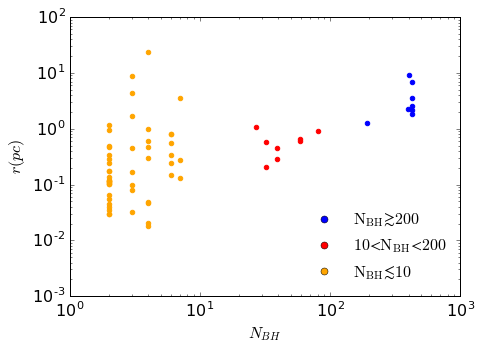

In [10]:
sourcedir='/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/kickgrid_msp.dat'
data=np.genfromtxt(sourcedir)
model=data[:,0]; R=np.array(data[:,3]); RC=np.array(data[:,6]); NBH=np.array(data[:,7]); NTOT=np.array(data[:,8])
R2D=data[:,9]
#print R2D

matplotlib.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [7, 5]

bdot = mlines.Line2D([], [],  linestyle = 'None', color='blue', marker='o',
                  markersize=7, label=r'$\rm{N_{BH} \gtrsim 200}$')
rdot=mlines.Line2D([], [],  linestyle = 'None', color='red', marker='o',
                  markersize=7, label=r'$\rm{10 \less N_{BH} \less 200}$')
odot=mlines.Line2D([], [],  linestyle = 'None', color='orange', marker='o',
                  markersize=7, label=r'$\rm{N_{BH} \lesssim 10}$')

##3D radius plot
#plt.figure()
#for i in range(len(model)):
#    if model[i]<11:
#        plt.scatter(np.log(NBH[i]), np.log(R[i]), color='b', s=20)
#    elif model[i]<=18:
#        plt.scatter(np.log(NBH[i]), np.log(R[i]), color='purple', s=20)
#    else:
#        plt.scatter(np.log(NBH[i]), np.log(R[i]), color='orange', s=20)
#
#plt.xlabel(r'$N_{BH}$')
#plt.ylabel(r'$r(pc)$')
#plt.title('3D Radius')
#plt.legend(handles=[bdot, pdot, odot], loc='lower right', prop={'size': 12}, numpoints=1, frameon=False)
#plt.show()

##2D radius plot
plt.figure()
for i in range(len(model)):
    if model[i]<11:
        plt.scatter(NBH[i], R2D[i], color='b', s=20)
    elif model[i]<18:
        plt.scatter(NBH[i], R2D[i], color='red', s=20)
    else:
        plt.scatter(NBH[i], R2D[i], color='orange', s=20)

plt.xlabel(r'$N_{BH}$')
plt.ylabel(r'$r(pc)$')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1000)
#plt.title('Distribution of MSP - 2D Radius')
plt.legend(handles=[bdot, rdot, odot], loc='lower right', prop={'size': 16}, numpoints=1, frameon=False)
#plt.show()
#plt.savefig(figsave+'radius.pdf', dpi=300)

0.24913 0.875314 2.86409
ModeResult(mode=array([ 0.033963]), count=array([2])) ModeResult(mode=array([ 0.219689]), count=array([2])) ModeResult(mode=array([ 1.29118]), count=array([2]))


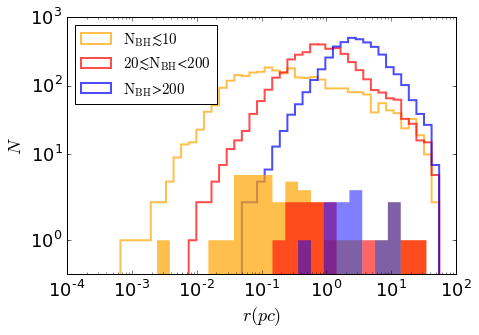

In [44]:
sourcedir='/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/'
datar=np.genfromtxt(sourcedir+'ns2Dradius_newmodel.dat')
datan=np.genfromtxt(sourcedir+'ns_number_newmodel.dat')
dataaccl=np.genfromtxt(sourcedir+'kickgrid_accl_msp_newmodel.dat')
model=datar[:,0]; R2D=np.array(datar[:,1])
nbh=datan[:,1]
modelmsp=dataaccl[:,0]; mspr2d=dataaccl[:,3]
#print model
#print R2D

matplotlib.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [7, 5]

bdot = mlines.Line2D([], [],  linestyle = 'None', color='blue', marker='o',
                  markersize=7, label=r'$\rm{N_{BH} \gtrsim 200}$')
rdot=mlines.Line2D([], [],  linestyle = 'None', color='red', marker='o',
                  markersize=7, label=r'$\rm{10 \less N_{BH} \less 200}$')
odot=mlines.Line2D([], [],  linestyle = 'None', color='orange', marker='o',
                  markersize=7, label=r'$\rm{N_{BH} \lesssim 10}$')


##2D radius plot
#plt.figure()
#for i in range(len(model)):
#    if model[i]<11:
#        plt.scatter(nbh[int(model[i])], R2D[i], color='b', s=20)
#    elif model[i]<18:
#        plt.scatter(nbh[int(model[i])], R2D[i], color='red', s=20)
#    else:
#        plt.scatter(nbh[int(model[i])], R2D[i], color='orange', s=20)
#
#plt.xlabel(r'$N_{BH}$')
#plt.ylabel(r'$r(pc)$')
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(1,1000)
##plt.title('Distribution of MSP - 2D Radius')
#plt.legend(handles=[bdot, rdot, odot], loc='lower right', prop={'size': 16}, numpoints=1, frameon=False)
##plt.show()
##plt.savefig(figsave+'radius.pdf', dpi=300)

r2d_bhpoor=[]; r2d_bhmid=[]; r2d_bhrich=[]
for j in range(len(model)):
    if model[j]<10:
        r2d_bhrich.append(R2D[j])
    elif model[j]<19:
        r2d_bhmid.append(R2D[j])
    elif model[j]<25:
        r2d_bhpoor.append(R2D[j])
    #else:
        #r2d_bhmid.append(R2D[j])
        
mspr2d_bhpoor=[]; mspr2d_bhmid=[]; mspr2d_bhrich=[]
for k in range(len(modelmsp)):
    if modelmsp[k]<10:
        mspr2d_bhrich.append(mspr2d[k])
    elif modelmsp[k]<19:
        mspr2d_bhmid.append(mspr2d[k])
    elif modelmsp[k]<25:
        mspr2d_bhpoor.append(mspr2d[k])
    #else:
        #r2d_bhmid.append(R2D[j])


#print r2d_bhpoor, r2d_bhmid, r2d_bhrich
median_poor=np.median(r2d_bhpoor); median_mid=np.median(r2d_bhmid); median_rich=np.median(r2d_bhrich)
print median_poor, median_mid, median_rich
mode_poor=stats.mode(r2d_bhpoor,axis=None); mode_mid=stats.mode(r2d_bhmid,axis=None); mode_rich=stats.mode(r2d_bhrich,axis=None)
print mode_poor, mode_mid, mode_rich


        
plt.figure()
plt.hist(r2d_bhpoor,  bins=np.logspace(np.log10(0.0001),np.log10(55), 50), histtype='step', lw=2, cumulative=False, color='orange', alpha=0.7, label=r'$\rm{N_{BH} \lesssim 10}$')
plt.hist(r2d_bhmid, bins=np.logspace(np.log10(0.0001),np.log10(55), 50),  histtype='step', lw=2, cumulative=False, color='red', alpha=0.7, label=r'$\rm{20 \lesssim N_{BH} \less 200}$')
plt.hist(r2d_bhrich, bins=np.logspace(np.log10(0.0001),np.log10(55), 50),  histtype='step', lw=2, cumulative=False, color='blue', alpha=0.7, label=r'$\rm{N_{BH} \greater 200}$')
plt.hist(mspr2d_bhpoor,  bins=np.logspace(np.log10(0.0001),np.log10(55), 30), histtype='stepfilled', lw=0, cumulative=False, color='orange', alpha=0.7)
plt.hist(mspr2d_bhmid, bins=np.logspace(np.log10(0.0001),np.log10(55), 30),  histtype='stepfilled', lw=0, cumulative=False, color='red', alpha=0.6)
plt.hist(mspr2d_bhrich, bins=np.logspace(np.log10(0.0001),np.log10(55), 30),  histtype='stepfilled', lw=0, cumulative=False, color='blue', alpha=0.5)
plt.yscale('symlog')
plt.xscale('log')
plt.xlabel(r'$r(pc)$')
plt.ylabel(r'$N$')
plt.legend(loc='upper left', prop={'size': 15})
#plt.show()
plt.tight_layout()
plt.savefig(figsave+'nsradius.pdf', dpi=300)

In [2]:
pathlist='/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/kickgrid_path.dat'
msplist='/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/kickgrid_msp.dat'
start=0
end=24
    
    
Rbh_mean, Rns_mean, Rmsp_mean, Dbh, Dbh_mean=ns.get_mean2Dradius_allmodels(pathlist, msplist, start, end)
Rbh3D_mean, Dbh3D, Dbh3D_mean=ns.get_mean3Dradius_allmodels(pathlist, start, end)

data=np.genfromtxt(msplist)
model=data[:,0]; R2D=data[:,9]

/software/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/software/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


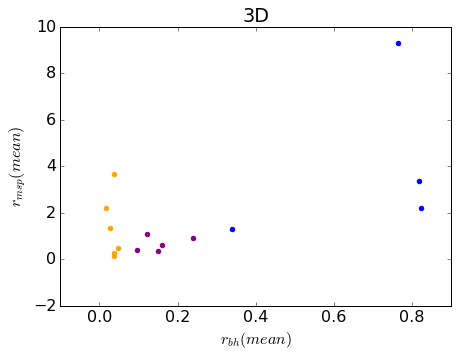

In [30]:
matplotlib.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [7, 5]

plt.figure()
for j in range(24):
    if j<11:plt.scatter(Rbh3D_mean[j], Rmsp_mean[j], color='b')
    elif j<18: plt.scatter(Rbh3D_mean[j], Rmsp_mean[j], color='purple')
    else: plt.scatter(Rbh3D_mean[j], Rmsp_mean[j], color='orange')

plt.xlabel(r'$r_{bh}(mean)$')
plt.ylabel(r'$r_{msp}(mean)$')
#plt.xscale('log')
plt.title('3D')
plt.show()

5112 2580 3773
8 73 8
52.2668 51.509 50.4232


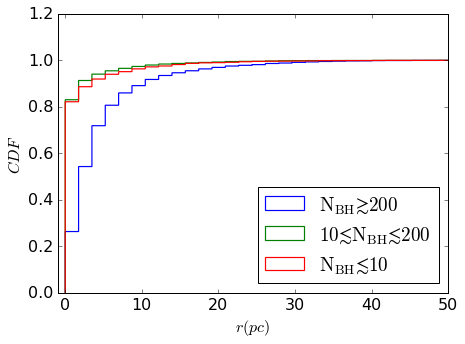

In [19]:
pathlist='/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/kickgrid_path.dat'
msplist='/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/kickgrid_msp.dat'
start=0
end=24

sourcedir=np.genfromtxt(pathlist, dtype=str)
datamsp=np.genfromtxt(msplist)
model=datamsp[:,0]; nsid=datamsp[:,1]; rmsp=datamsp[:,9]

rns_bhpoor=[]; rns_bhmid=[]; rns_bhrich=[]
rmsp_bhpoor=[]; rmsp_bhmid=[]; rmsp_bhrich=[]

for i in range(start, end):
    #print i
    pref='initial'
    filepath=sourcedir[i]
    filestr=filepath+'/'+pref
    projs=np.sort(glob(filestr+'.snap*.2Dproj.dat'))
    observs=np.sort(glob(filestr+'.snap*.obs_params.dat'))
    lastproj=projs[-1]
    lastobs=observs[-1]

    mspids=[]
    for j in range(len(model)):
        if int(model[j])==i:
            mspids.append(int(nsid[j]))

    Rbh, Rns, Rmsp, Mbh, Mns, Mmsp, Rc, Rhl=ns.get_2Dradius(lastproj, lastobs, mspids)
    
    if i>18: rns_bhpoor=rns_bhpoor+Rns
    elif i<11: rns_bhrich=rns_bhrich+Rns
    else: rns_bhmid=rns_bhmid+Rns
        

for k in range(len(model)):
    if model[k]>=18: rmsp_bhpoor.append(rmsp[k])
    elif model[k]<11: rmsp_bhrich.append(rmsp[k])
    else: rmsp_bhmid.append(rmsp[k])
        
print len(rns_bhrich), len(rns_bhpoor), len(rns_bhmid)
print len(rmsp_bhrich), len(rmsp_bhpoor), len(rmsp_bhmid)

rns_bhrpoor=np.pad(rns_bhpoor, (0, 2532), 'constant')
rns_bhmid=np.pad(rns_bhmid, (0, 1339), 'constant')
rmsp_bhrich=np.pad(rmsp_bhrich, (0, 5104), 'constant')
rmsp_bhpoor=np.pad(rmsp_bhpoor, (0, 5074), 'constant')
rmsp_bhmid=np.pad(rmsp_bhmid, (0, 5098), 'constant')

print np.max(rns_bhrich), np.max(rns_bhpoor), np.max(rns_bhmid)
weights_ns_bhrich= np.ones_like(rns_bhrich)/float(len(rns_bhrich))
weights_ns_bhpoor= np.ones_like(rns_bhpoor)/float(len(rns_bhpoor))
weights_ns_bhmid= np.ones_like(rns_bhmid)/float(len(rns_bhmid))
weights_msp_bhrich= np.ones_like(rmsp_bhrich)/float(len(rmsp_bhrich))
weights_msp_bhpoor= np.ones_like(rmsp_bhpoor)/float(len(rmsp_bhpoor))
weights_msp_bhmid= np.ones_like(rmsp_bhmid)/float(len(rmsp_bhmid))

matplotlib.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [7, 5]
plt.figure()
plt.hist(rns_bhrich, bins=30, histtype='step', lw=1.2, weights=weights_ns_bhrich, cumulative=True, range=(0.0, max(rns_bhrich)), label=r'$\rm{N_{BH} \gtrsim 200}$')
plt.hist(rns_bhmid, bins=30, histtype='step', lw=1.2, weights=weights_ns_bhmid, cumulative=True, range=(0.0, max(rns_bhrich)), label=r'$\rm{10 \lesssim N_{BH} \lesssim 200}$')
plt.hist(rns_bhpoor, bins=30, histtype='step', lw=1.2, weights=weights_ns_bhpoor, cumulative=True, range=(0.0, max(rns_bhrich)), label=r'$\rm{N_{BH} \lesssim 10}$')
#plt.hist(rmsp_bhrich, bins=100, histtype='step', lw=1.2, weights=weights_msp_bhrich, cumulative=True, range=(0.0, max(rmsp_bhpoor)), label=r'$\rm{N_{BH} \gtrsim 200}$')
#plt.hist(rmsp_bhmid, bins=100, histtype='step', lw=1.2, weights=weights_msp_bhmid, cumulative=True, range=(0.0, max(rmsp_bhpoor)), label=r'$\rm{10 \lesssim N_{BH} \lesssim 200}$')
#plt.hist(rmsp_bhpoor, bins=100, histtype='step', lw=1.2, weights=weights_msp_bhpoor, cumulative=True, range=(0.0, max(rmsp_bhpoor)), label=r'$\rm{N_{BH} \lesssim 10}$')


#plt.ylim(0.0, 1.2)
plt.xlim(-1., 50.)
plt.ylabel(r'$CDF$')
plt.xlabel(r'$r(pc)$')
plt.legend(loc='lower right')
plt.show()

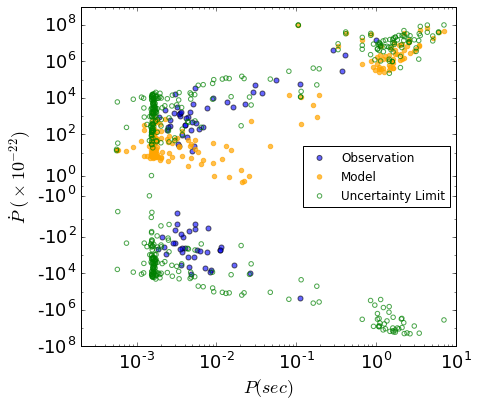

In [10]:
###Plot B-P of MSPs from models on top of observed data###

###Model Data###
datamsp=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/kickgrid_msp_newmodel.dat')
datapsr=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/kickgrid_normalpsr_newmodel.dat')

B=np.array(datamsp[:,4]); P=np.array(datamsp[:,5])
Bpsr=np.array(datapsr[:,4]); Ppsr=np.array(datapsr[:,5])

Pdot=Kconst*yearsc*B*B/P
Pdotpsr=Kconst*yearsc*Bpsr*Bpsr/Ppsr
#print Pdot/P, Pdotpsr/Ppsr

#Pdot_log=np.log10(Pdot); Pdotpsr_log=np.log10(Pdotpsr)

###Observational Data###
Ps, Pb, Pdots, Pdotb=ns.readdata_freire() #P in ms, B in G
Ps, Pb, Pdots, Pdotb=np.array(Ps), np.array(Pb), np.array(Pdots), np.array(Pdotb)
#print Pdots, Pdotb

#Pdots_logplus=[]; Pdots_logminus=[]; Pdotb_logplus=[]; Pdotb_logminus=[]
#Pdotsplus=[]; Pdotsminus=[]; Pdotbplus=[]; Pdotbminus=[]; Psplus=[]; Psminus=[]; Pbplus=[]; Pbminus=[]
#for i in range(len(Pdots)):
#    if Pdots[i]>0: Pdots_logplus.append(math.log10(Pdots[i])); Pdotsplus.append(Pdots[i]); Psplus.append(Ps[i])
#    else: Pdots_logminus.append(math.log10(abs(Pdots[i]))); Pdotsminus.append(Pdots[i]); Psminus.append(Ps[i])
#
#for j in range(len(Pdotb)):
#    if Pdotb[j]>0: Pdotb_logplus.append(math.log10(Pdotb[j])); Pdotbplus.append(Pdotb[j]); Pbplus.append(Pb[j])
#    else: Pdotb_logminus.append(-1*math.log10(abs(Pdotb[j]))); Pdotbminus.append(Pdotb[j]); Pbminus.append(Pb[j])


###Acceleration for the model data### 
dpdotm, dpdotp, pdotlow, pdotup, pmod=ns.get_acceleration('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs//paper/data/kickgrid_accl_msp_newmodel.dat', \
                                   '/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/kickgrid_msp_newmodel.dat')
dpdotm_psr, dpdotp_psr, pdotlow_psr, pdotup_psr, ppsrmod=ns.get_acceleration('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/kickgrid_accl_normalpsr_newmodel.dat', \
                                   '/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/kickgrid_normalpsr_newmodel.dat')

dpdotm, dpdotp, pdotlow, pdotup=np.array(dpdotm), np.array(dpdotp), np.array(pdotlow), np.array(pdotup)
dpdotm_psr, dpdotp_psr, pdotlow_psr, pdotup_psr=np.array(dpdotm_psr), np.array(dpdotp_psr), np.array(pdotlow_psr), np.array(pdotup_psr)

#pdotup_log=np.log10(pdotup)
#pdotlowplus=np.array(pdotlowplus); pdotlowminus=np.array(pdotlowminus)

###Scaling###
Pdots=Pdots*10**19*1000; Pdotb=Pdotb*10**19*1000
Pdot=Pdot*10**19*1000; Pdotpsr=Pdotpsr*10**19*1000
pdotlow=pdotlow*10**19*1000; pdotup=pdotup*10**19*1000
pdotlow_psr=pdotlow_psr*10**19*1000; pdotup_psr=pdotup_psr*10**19*1000

#Death Line
x=np.logspace(-2.0, 2.0, num=50)

matplotlib.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [7, 6]

plt.figure()

plt.scatter(Ps*0.001, Pdots, c='b', alpha=0.6, s=25, label='Observation')
plt.scatter(Pb*0.001, Pdotb, c='b', alpha=0.6, s=25)
#plt.plot(x, (x**2)*(0.17*10**12), 'k--')    #Deadthline
###
plt.scatter(P, Pdot, color='orange', alpha=0.7, s=20, label='Model')
plt.scatter(pmod, pdotlow, color='green', alpha=0.7, facecolor='none', label='Uncertainty Limit')
plt.scatter(pmod, pdotup, color='green', alpha=0.7, facecolor='none')
####
plt.scatter(Ppsr, Pdotpsr, color='orange', alpha=0.7)
plt.scatter(ppsrmod, pdotlow_psr, color='green', alpha=0.7, facecolor='none')
plt.scatter(ppsrmod, pdotup_psr, color='green', alpha=0.7, facecolor='none')
###
#plt.hline(y=0)
###
plt.xscale('log')
plt.yscale('symlog')
plt.xlabel(r'$P(sec)$')
plt.ylabel(r'$\dot{P}\ (\times 10^{-22})$')
plt.ylim(-100000000, 1000000000)
plt.xlim(0.0002, 10.)
#ax.yaxis.set_major_locator(plt.MaxNLocator(3))
#plt.locator_params(nbins=10)
yticks = plt.gca().yaxis.get_major_ticks()
yticks[5].set_visible(False)
plt.locator_params(numticks=10)
plt.tight_layout()
plt.legend(loc='center right', scatterpoints=1, prop={'size': 12})
plt.savefig('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/plots/ppdot.pdf', dpi=300)

[3309.8377168433] ['BS']
[] []
[5338.417746152099, 5412.1661986672, 5549.9393072381, 5667.0410192174, 5713.093151268199, 5772.7016686298, 5919.304012776, 6176.7873315412, 6295.193292628, 6594.490866476] ['BS', 'BS', 'BS', 'BS', 'BS', 'BB', 'BB', 'BS', 'BS', 'BB']
5338.41774615
5412.16619867
5549.93930724
5667.04101922
5713.09315127
5772.70166863
5919.30401278
6176.78733154
6295.19329263
6594.49086648
[3498.6918588861995, 6015.3416664412, 6062.6604745119, 6155.0015217628, 6180.6863046157, 6195.8226535648, 6398.921855056699] ['BS', 'BS', 'BB', 'BS', 'BS', 'BS', 'BS']
[4222.8895531073995, 4699.5380310064] ['BS', 'BS']
4222.88955311
4699.53803101
[5907.5728875033, 5908.8850950651995, 5910.643167382499, 5915.212487193, 5916.2014781994, 5918.6057731878, 6177.1268858853, 6244.2758857437] ['BB', 'BS', 'BS', 'BB', 'BS', 'BB', 'BB', 'BB']
6177.12688589
6244.27588574
[5905.9120766815995, 5906.2003984755, 5911.9022866969, 5932.967416341399, 5946.2076826606, 5965.786169197, 5967.6229077751, 5967.88

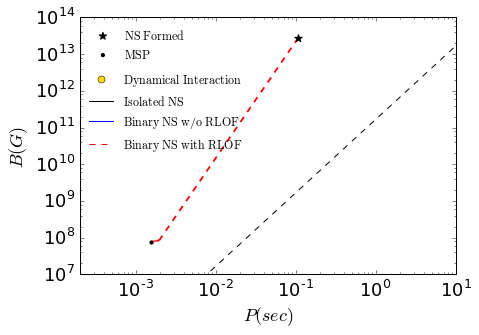

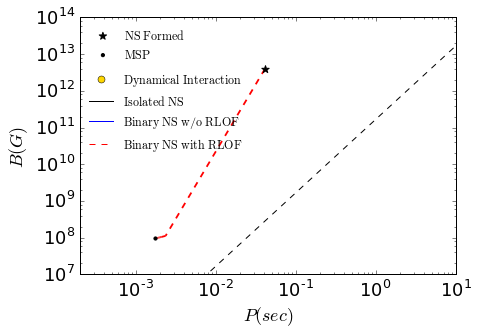

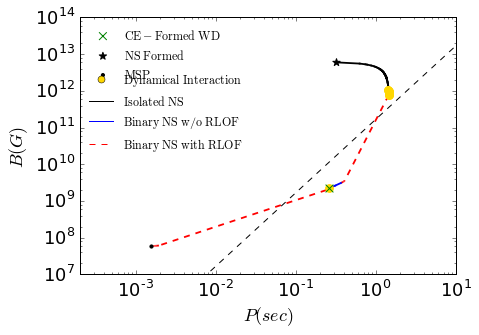

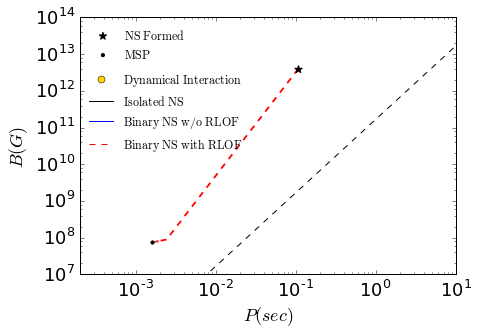

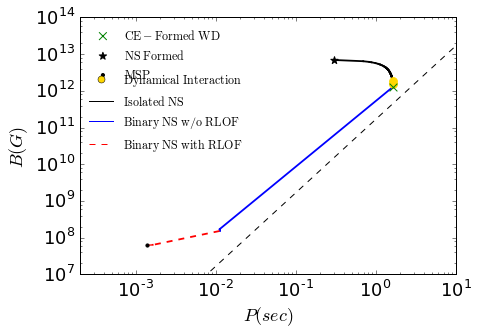

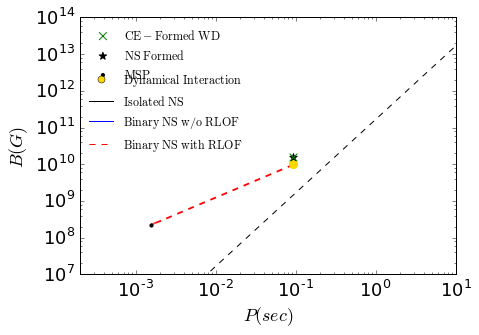

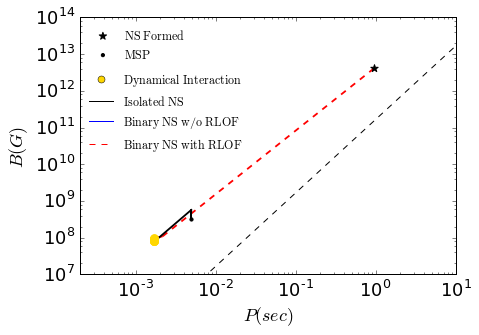

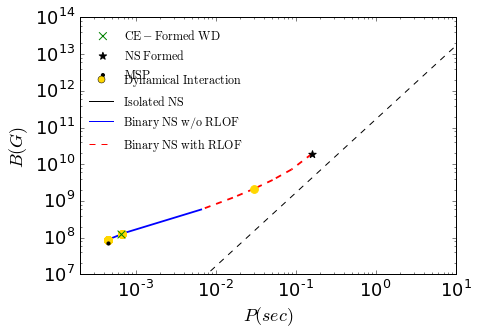

In [11]:
##Plot evolution of B-P
sourcedir='/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/history/MSP/23/BP'
idfile=glob(sourcedir+'/'+'*.dat')
#print idfile
dl=np.logspace(-3.8, 1.4, num=50)

for i in range(len(idfile)):
    #print idfile[i]
    dataid=np.genfromtxt(idfile[i])
    B=dataid[:,1]; P=dataid[:,2]; FC=dataid[:,3]; k1=dataid[:, 9]; t=dataid[:,0]; radrol1=dataid[:, 11]
    labels=idfile[i].replace(sourcedir+'/', '')
    idstr=labels.replace('.dat', '')
    theid=int(idstr)
    
    if FC[0]!=-100: formation=FC[0]
    if FC[-1]!=-100: formation=FC[-1]
    
    check=0
    if B[0]<10**10:
        while (check<1):
            ##Initialize Spin
            u1=np.random.random_sample()
            u2=np.random.random_sample()
            s=np.sqrt(-2.*np.log(1.-u1))*np.cos(twopi*u2)
            s=0.7*s-0.6
            if -1.5<s and s<0.013:
                p0=10.**s
        
            ##Initialize B-field
            u1=np.random.random_sample()
            u2=np.random.random_sample()
            s=np.sqrt(-2.*np.log(1.-u1))*np.cos(twopi*u2)
            s=0.68*s+12.6
            if 11.5<=s and s<=13.8:
                b0=10.**s
            
            if p0!=0 and b0!=0:
                P=np.insert(P, 0, p0); B=np.insert(B, 0, b0); k1=np.insert(k1, 0, -1)
                check=1
    
    time, types=ns.get_interact_t_type(theid, 'initial', '/projects/b1011/sourav/new_runs/kick_grid/rv1/kickscale_1.0')
    print time, types
    
    matplotlib.rcParams.update({'font.size': 18})
    plt.rcParams['figure.figsize'] = [7, 5]
    plt.figure()
    plt.plot(dl, (dl**2)*(0.17*10**12), 'k--', lw=1.0)    #Deathline
    for j in range(len(t)-1):
        x=P[j:j+2]; y=B[j:j+2]
        z=t[j:j+2]
        if k1[j+1]==-100:
            plt.plot(x, y, lw=1.8, color='k', zorder=1)
        else: 
            if radrol1[j+1]<=1:
                plt.plot(x, y, lw=1.8, color='b', zorder=1)
            else:
                plt.plot(x, y, lw=1.8, ls='--', color='r', zorder=1)
                #if check==1:
                    #if j==0:
                        #plt.plot(x, y, lw=1.5, ls='--', color='b', zorder=1)
            
        #if (k1[j]==-100 and k1[j+1]>-100):
            #plt.scatter(P[j], B[j], facecolors='none', edgecolors='darkorange', s=60, label=r'$\rm{Dynamical\ Interaction}$', zorder=2)
        #if  (k1[j+1]==-100 and k1[j]>-100):
            #plt.scatter(P[j], B[j], facecolors='none', edgecolors='darkorange', s=60, label=r'$\rm{Dynamical\ Interaction}$', zorder=2)
        if (k1[j]>=0 and k1[j]<10) and k1[j+1]>=10:
            plt.scatter(P[j], B[j], marker='x', color='g', s=60, label=r'$\rm{CE-Formed\ WD}$', zorder=3)
        
        for k in range(len(time)):
            if time[k]<=z[1] and time[k]>=z[0]:
                print time[k]
                #if (time[k]-z[0])>(z[1]-time[k]):
                    #plt.scatter(P[j+1], B[j+1], marker='o', s=60, color='gold', zorder=2)
                #else:
                plt.scatter(P[j], B[j], marker='o', color='gold', s=60, zorder=2)
            
    #if check==0: 
    plt.scatter(P[0], B[0], marker='*', s=60, color='k', label=r'$\rm{NS\ Formed}$', zorder=2)
    #else:
        #plt.scatter(P[0], B[0], marker='*', s=60, color='k', facecolors='none', label=r'$\rm{NS\ Formed}$', zorder=2)
    
    kline = mlines.Line2D([], [], color='k', label=r'$\rm{Isolated\ NS}$')
    bline = mlines.Line2D([], [], color='b', label=r'$\rm{Binary\ NS\ w/o\ RLOF}$')
    rline = mlines.Line2D([], [], color='r', ls='--', label=r'$\rm{Binary\ NS\ with\ RLOF}$')
    cross=mlines.Line2D([], [],  linestyle = 'None', color='gold', marker='o', markeredgecolor=None, markersize=7, label=r'$\rm{Dynamical\ Interaction}$')
    plt.scatter(P[-1], B[-1], marker='.', s=40, color='k', label=r'$\rm{MSP}$', zorder=2)
    plt.xlabel(r'$P(sec)$')
    plt.ylabel(r'$B(G)$')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0.0002, 10)
    plt.ylim(10**7, 10**14)
    legend1=plt.legend(loc='upper left', prop={'size': 12}, scatterpoints=1, frameon=False)
    plt.gca().add_artist(legend1)
    plt.legend(handles=[cross, kline, bline, rline], loc='lower right', bbox_to_anchor=(0.46, 0.43), prop={'size': 12}, frameon=False, numpoints=1)
    ##0.45, 0.42
    ##1, 0.01
    #plt.title(idstr)
    #plt.show()
    plt.tight_layout()
    plt.savefig(figsave+labels+'_BP.pdf')

[6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 7, 6, 6, 5, 6, 9, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6]
[0, 1, 2, 4] [15, 49, 1, 1] [ 0.22727273  0.74242424  0.01515152  0.01515152]


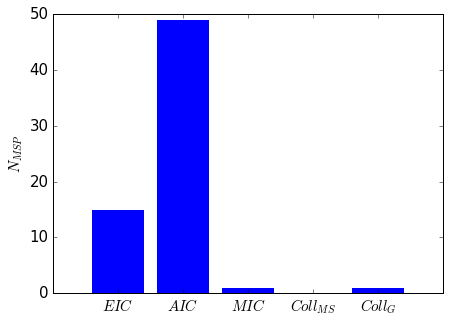

In [9]:
fc=[]
with open('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/kickgrid_msp.dat', 'r') as fmsp:
    next(fmsp)
    for line in fmsp:
        data=line.split()
        if int(data[0])<24 and int(data[-1])!=-100:
            fc.append(int(data[-1]))

print fc
fc=np.array(fc)-5
x=Counter(fc).keys()
y=Counter(fc).values()
y_norm=y/np.sum(y).astype(np.float)
print x, y, y_norm

ind = np.arange(5)
matplotlib.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = [7, 5]
plt.figure()
plt.bar(x, y, align='center', edgecolor='none')
plt.xticks(ind, (r'$EIC$', r'$AIC$', r'$MIC$', r'$Coll_{MS}$', r'$Coll_{G}$'))
plt.ylabel(r'$N_{MSP}$')
#plt.yscale('symlog')
#plt.ylim(0, 100)
#plt.savefig('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/plots/histfc.pdf', dpi=300)

In [6]:
datans=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/primordial_ns.dat')
Nns_ret=np.array(datans[:,0]); Nns_ret_pri=np.array(datans[:,1]); Nns_esc=np.array(datans[:,2]); Nns_esc_pri=np.array(datans[:,3])
Nns_tot=Nns_ret+Nns_esc

Nns_ret_dyn=Nns_ret-Nns_ret_pri
print sum(Nns_ret_dyn), Nns_ret_dyn
Nns_dyn_frac=Nns_ret_dyn/Nns_ret
Nns_ret_frac=Nns_ret/Nns_tot
print Nns_dyn_frac
print Nns_ret_frac

1425.0 [  30.   21.   23.    8.   24.   17.   27.   28.   25.   23.   30.   41.
   29.  157.  278.  281.  232.   19.   19.   16.   22.   25.   23.   27.]
[ 0.06315789  0.04565217  0.04609218  0.01781737  0.048583    0.03736264
  0.05869565  0.05773196  0.05434783  0.04563492  0.06036217  0.07839388
  0.0605428   0.26929674  0.3792633   0.38387978  0.33918129  0.04112554
  0.04        0.03686636  0.0464135   0.0501002   0.04872881  0.05769231]
[ 0.08367095  0.08084359  0.08779029  0.08063937  0.08860987  0.08139535
  0.08204031  0.0862069   0.08201105  0.08987161  0.08784023  0.0907356
  0.08425682  0.09568357  0.11647863  0.11584111  0.10972089  0.08140969
  0.08349446  0.07635468  0.08331869  0.08751315  0.08298172  0.08217735]


[5.75678, 5.3575699999999999, 2.62358, 4.0403799999999999, 4.3461699999999999, 3.6766399999999999, 3.0539499999999999, 4.5544500000000001, 1.84538, 3.7046399999999999, 5.5535899999999998, 8.4360999999999997, 2.9589099999999999, 1.8900999999999999, 288.60300000000001, 6.2269300000000003, 16.263999999999999, 26.5687, 5.1399400000000002, 7.1756099999999998, 3.7387000000000001, 4.2265300000000003, 5.4400000000000004, 378.596, 405.93400000000003, 3.0543100000000001, 3.2322700000000002, 8.3577999999999992, 5.2773300000000001, 9.0352899999999998, 4.5717699999999999, 5.3843199999999998, 110.66500000000001, 56.133000000000003, 4.8028000000000004, 4.65144, 4.0270400000000004, 37.660200000000003, 6.7433899999999998, 3.53633, 3.21034, 3.4849899999999998, 2.1006300000000002, 2.6433399999999998, 4.0331799999999998, 3.4804599999999999, 2.8304100000000001, 7.5884799999999997, 4.3428300000000002, 2.3523399999999999, 4.7715199999999998, 2.1966600000000001, 4.9905799999999996, 2.3889999999999998, 7.94693

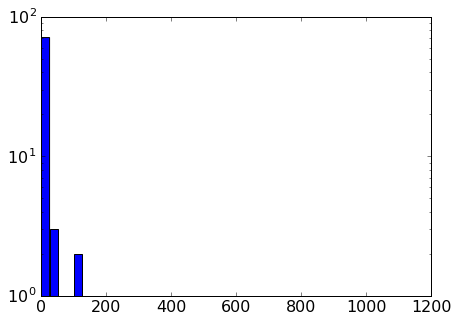

In [36]:
Ps, Pb, Bs, Bb=ns.readdata_freire() #P in ms, B in G
P=list(Ps)+list(Pb)
#print P

matplotlib.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [7, 5]
plt.figure()
plt.hist(P, bins=40)
plt.show()

2.46186156627e-11
2.65912500008e-10
1.80403361084e-13
6.49203883801e-13
2.63600600448e-10
2.53627616659e-10
2.82080856861e-12
7.19393576753e-13
1.01863748177e-11
5.41798227391e-13
8.13758167557e-12
6.10117036885e-13
7.71225586134e-13
4.16296064341e-13
4.80271966294e-12
2.23790375739e-13
4.56780887694e-10
2.6668651001e-13
8.17845429737e-14
8.77411557729e-13
2.24770658302e-16
9.10180713772e-13
1.91390685185e-13
4.50073851598e-13
6.91184301007e-13
1.69564009172e-13
2.97758186187e-13
2.59214946738e-13
1.85976479858e-13
3.91065541798e-13
1.60945922839e-15
6.58674436898e-13
2.73700035669e-13
8.25328725636e-13
1.71302324583e-13
2.51686684688e-13
1.09372525041e-12
2.64985589542e-12
1.64707008197e-13
1.27742676583e-13
3.47541233907e-13
1.97577252787e-16
2.77878772771e-13
2.60014171426e-10
2.49153196574e-10
5.38166565973e-13
4.52290024769e-10
5.70394692854e-13
3.79537472807e-12
4.83728841908e-13
1.95878995623e-12
6.68481213419e-13
3.80582310172e-13
2.63010412632e-10
6.32343996324e-12
4.283926644

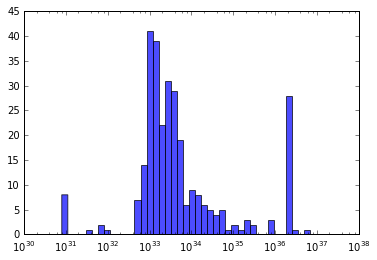

In [3]:
msp1012=np.genfromtxt('/projects/b1011/syr904/cmc/cmc-NSspecialkick-02/rundir/kick50_IMF20_fb50_newcode_old/msp10to12Gyr.dat')
ma=msp1012[:,14]; md=msp1012[:,15]; a=msp1012[:,18]; radrol1=msp1012[:,13]; k1=msp1012[:,17]
LX=[]; Mdot=[]; Mcritical=[]
for i in range(len(ma)):
    if md[i]>0 and radrol1[i]>1:
        MA=ma[i]; MD=md[i]; A=a[i]; Kcom=k1[i]
        lum, mdot, mcrit=ns.XrayLum(MA, MD, A, Kcom)
        LX.append(lum); Mdot.append(mdot); Mcritical.append(mcrit) 
        
nlmxb=0; nmsp=0    
for j in range(len(Mdot)):
    if Mdot[j]<=Mcritical[j]: nmsp+=1
    else: nlmxb+=1
        
print nlmxb, nmsp

plt.figure()
plt.hist(LX,  bins=np.logspace(np.log10(8*10e29),np.log10(10e37), 50), color='b', alpha=0.7)
plt.xscale('log')
plt.show()

[ 1120000.   380000.   447000.   372000.  2000000.   501000.   525000.
   550000.   200000.   794000.] [ 2000000.  1120000.   551000.   589000.   200000.   447000.   372000.
   380000.  1450000.]
[ 12.67857143  12.63157895  10.73825503  13.44086022  16.7         35.12974052
  17.52380952  43.63636364  44.          19.89924433] [ 5.012       2.00357143  3.80036298  3.24278438  4.57        1.38255034
  2.04301075  1.05263158  1.12137931]
[  0.47733563   0.94249168   0.47138236   0.46709732   0.           0.94872314
   0.46452115   0.45778671   0.45499154   0.45083499   0.44591381
   0.87824025   0.43591847   0.43228447   0.           0.43136671
   0.85655774   2.12729255   1.27706027   0.43579254   1.72473322
   3.48606436   3.8519008    7.3468664    4.3884187   11.8028719 ]
[  1.54602945e+06   1.56042940e+06   1.97102175e+06   2.09562294e+06
   1.97225178e+06   1.94283765e+06   2.69003517e+06   3.00986092e+06
   4.76378811e+06   6.35346162e+06   7.24301681e+06   1.31843459e+07
   1.6866

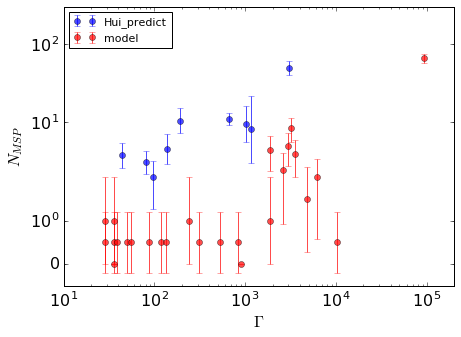

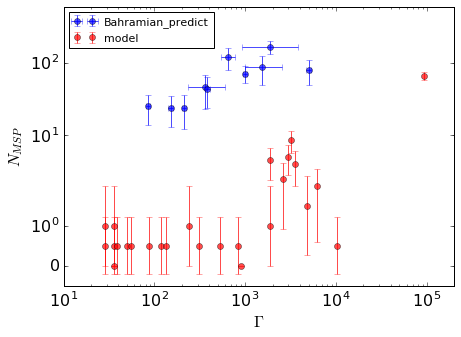

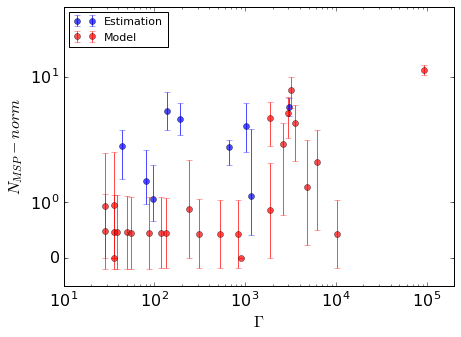

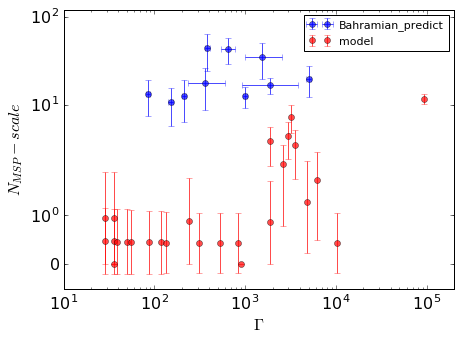

In [5]:
###Plotting Gamma-Npsr

datagammaB=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/Gamma_Nmsp_Bahramian.dat')
datagammaH=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/Gamma_Nmsp_Hui.dat')
dataN=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/ns_number_newmodel.dat')
dataMmodel=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/kickgrid_obsproperty_newmodel.dat')
dataGamma=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/GammaModel_newmodel.dat')

NB_predt=np.array(datagammaB[:,1]); gammaB=np.array(datagammaB[:,6]); MB=np.array(datagammaB[:,12])
NH_predt=np.array(datagammaH[:,1]); gammaH=np.array(datagammaH[:,4]); MH=np.array(datagammaH[:,5])

dNB=np.array(datagammaB[:,2]); dGB_minus=np.array(datagammaB[:,7]); dGB_plus=np.array(datagammaB[:,8])
dNH_plus=np.array(datagammaH[:,2]); dNH_minus=np.array(datagammaH[:,3])

NB_predt_norm=NB_predt/MB*(2*10**5); NH_predt_norm=NH_predt/MH*(2*10**5)
print MB, MH
print NB_predt_norm, NH_predt_norm

M=np.array(dataMmodel[:,5])
N_model=np.array(dataN[:,5])*0.5   ##Number of all observable pulsars
dN_model=np.sqrt(N_model)
N_model_norm=N_model/M*(2*10**5)
print N_model_norm
#G_model=ns.get_EncounterRates_lastsnap('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/path_paper.dat')
G_model=np.array(dataGamma[:,1])

print G_model

Nmdl=[]; Gmdl=[]
for i in range(len(N_model)):
    if N_model[i]!=0: Nmdl.append(N_model[i]); Gmdl.append(G_model[i])
    
aB=5.43*10**4; aH=7.3*10**5
G_model_scale=np.array(G_model)/aB
gammaH=gammaH*aH/aB


matplotlib.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [7, 5]
plt.figure()
plt.errorbar(gammaH, NH_predt, yerr=[dNH_minus, dNH_plus], fmt='o', color='b', alpha=0.7, label='Hui_predict')
plt.errorbar(G_model_scale, N_model, yerr=dN_model, fmt='o', color='r', alpha=0.7, label='model')
plt.xscale('log')
plt.yscale('symlog')
plt.ylim(-0.5, 300)
plt.xlim(10, 2*10**5)
#plt.ylim(-10**-5, 10**-4)
plt.xlabel(r'$\Gamma$')
plt.ylabel(r'$N_{MSP}$')
plt.legend(loc='upper left', prop={'size': 11})
plt.show()

plt.figure()
plt.errorbar(gammaB, NB_predt, xerr=[dGB_minus, dGB_plus], yerr=dNB, fmt='o', color='b', alpha=0.7, label='Bahramian_predict')
plt.errorbar(G_model_scale, N_model, yerr=dN_model, fmt='o', color='r', alpha=0.7, label='model')
plt.xscale('log')
plt.yscale('symlog')
plt.ylim(-0.5, 600)
plt.xlim(10, 2*10**5)
#plt.ylim(-10**-5, 10**-4)
plt.xlabel(r'$\Gamma$')
plt.ylabel(r'$N_{MSP}$')
plt.legend(loc='upper left', prop={'size': 11})
plt.show()

plt.figure()
plt.errorbar(gammaH, NH_predt_norm, yerr=[dNH_minus/MH*(2*10**5), dNH_plus/MH*(2*10**5)], fmt='o', color='b', alpha=0.7, label='Estimation')
plt.errorbar(G_model_scale, N_model_norm, yerr=dN_model/M*(2*10**5), fmt='o', color='r', alpha=0.7, label='Model')
plt.xscale('log')
plt.yscale('symlog')
plt.ylim(-0.5, 50)
plt.xlim(10, 2*10**5)
#plt.ylim(-10**-5, 10**-4)
#plt.yticks(np.arange(min(N_model_norm), max(N_model_norm)+10**-5, 10**-5))
plt.xlabel(r'$\Gamma$')
plt.ylabel(r'$N_{MSP}-norm$')
plt.legend(loc='upper left', prop={'size': 11})
#plt.show()
plt.savefig(figsave+'N-gamma.pdf', dpi=300)

plt.figure()
plt.errorbar(gammaB, NB_predt_norm, xerr=[dGB_minus, dGB_plus], yerr=dNB/MB*(2*10**5), fmt='o', color='b', alpha=0.7, label='Bahramian_predict')
plt.errorbar(G_model_scale, N_model_norm, yerr=dN_model/M*(2*10**5), fmt='o', color='r', alpha=0.7, label='model')
plt.xscale('log')
plt.yscale('symlog')
plt.ylim(-0.5, 120)
plt.xlim(10, 2*10**5)
#plt.ylim(-10**-5, 2.5*10**-4)
#plt.yticks(np.arange(min(N_model_norm), max(NB_predt_norm)+10**-5, 10**-5))
plt.xlabel(r'$\Gamma$')
plt.ylabel(r'$N_{MSP}-scale$')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()

In [ ]:


datagammaH=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/Gamma_Nmsp_Hui.dat')
dataN=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/ns_number_newmodel.dat')
dataMmodel=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/kickgrid_obsproperty_newmodel.dat')
dataGamma=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/GammaModel_newmodel.dat')

NB_predt=np.array(datagammaB[:,1]); gammaB=np.array(datagammaB[:,6]); MB=np.array(datagammaB[:,12])
NH_predt=np.array(datagammaH[:,1]); gammaH=np.array(datagammaH[:,4]); MH=np.array(datagammaH[:,5])

dNB=np.array(datagammaB[:,2]); dGB_minus=np.array(datagammaB[:,7]); dGB_plus=np.array(datagammaB[:,8])
dNH_plus=np.array(datagammaH[:,2]); dNH_minus=np.array(datagammaH[:,3])

NB_predt_norm=NB_predt/MB*(2*10**5); NH_predt_norm=NH_predt/MH*(2*10**5)
print MB, MH
print NB_predt_norm, NH_predt_norm

M=np.array(dataMmodel[:,5])
N_model=np.array(dataN[:,5])   ##Number of all pulsars
dN_model=np.sqrt(N_model)
N_model_norm=N_model/M*(2*10**5)
print N_model_norm
#G_model=ns.get_EncounterRates_lastsnap('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/path_paper.dat')
G_model=np.array(dataGamma[:,1])

print G_model

Nmdl=[]; Gmdl=[]
for i in range(len(N_model)):
    if N_model[i]!=0: Nmdl.append(N_model[i]); Gmdl.append(G_model[i])
    
aB=5.43*10**4; aH=7.3*10**5
G_model_scale=np.array(G_model)/aB
gammaH=gammaH*aH/aB


matplotlib.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [7, 5]

plt.figure()
plt.errorbar(gammaH, NH_predt_norm, yerr=[dNH_minus/MH*(2*10**5), dNH_plus/MH*(2*10**5)], fmt='o', color='b', alpha=0.7, label='Estimation')
plt.errorbar(G_model_scale, N_model_norm, yerr=dN_model/M*(2*10**5), fmt='o', color='r', alpha=0.7, label='Model')
plt.xscale('log')
plt.yscale('symlog')
plt.ylim(-0.5, )
plt.xlim(10, 2*10**5)
#plt.ylim(-10**-5, 10**-4)
#plt.yticks(np.arange(min(N_model_norm), max(N_model_norm)+10**-5, 10**-5))
plt.xlabel(r'$\Gamma$')
plt.ylabel(r'$N_{MSP}-norm$')
plt.legend(loc='upper left', prop={'size': 11})
#plt.show()
#plt.savefig(figsave+'N-gamma.pdf', dpi=300)

0
8
14
18
57
120 16
0
0.000561
8
0.000581
57
0.000747
63
0.000574
67
0.000909
cant detect: 113


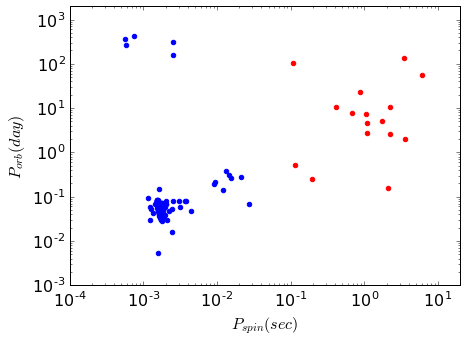

In [9]:
datamsp=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/kickgrid_msp_newmodel.dat')
datanormalpsr=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/kickgrid_normalpsr_newmodel.dat')

Pmsp=np.array(datamsp[:,5]); amsp=np.array(datamsp[:,17])
m0msp=np.array(datamsp[:,13]); m1msp=np.array(datamsp[:,14])
Pnpsr=np.array(datanormalpsr[:,5]); anpsr=np.array(datanormalpsr[:,17])  
m0npsr=np.array(datanormalpsr[:,13]); m1npsr=np.array(datanormalpsr[:,14])

Tmspb=[]; Pmspb=[]
for i in range(len(Pmsp)):
    if m1msp[i]!=-100.0:
        Tmspb.append(twopi*math.sqrt((amsp[i]*AU)**3/(Gconst*(m0msp[i]+m1msp[i])*Msun))/(3600.0*24.))
        if Tmspb[-1]>100.0: print i
        Pmspb.append(Pmsp[i])
        
Tnpsrb=[]; Pnpsrb=[]
for j in range(len(Pnpsr)):
    if m1npsr[j]!=-100.0:
        Tnpsrb.append(twopi*math.sqrt((anpsr[j]*AU)**3/(Gconst*(m0npsr[j]+m1npsr[j])*Msun))/(3600.0*24.))
        Pnpsrb.append(Pnpsr[j])

print len(Tmspb), len(Tnpsrb)

for k in range(len(Pmsp)):
    if Pmsp[k]<0.001: print k; print Pmsp[k]
        
n=0
for l in range(len(Pmspb)):
    if Pmspb[l]<0.02 and Tmspb[l]<1.:n+=1
        
print 'cant detect:', n
        
matplotlib.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [7, 5]
plt.figure()
plt.scatter(Pmspb, Tmspb, color='b')
plt.scatter(Pnpsrb, Tnpsrb, color='r')
plt.yscale('log')
plt.xscale('log')
plt.ylim(0.001, 2000)
plt.xlim(0.0001, 20)
plt.xlabel(r'$P_{spin}(sec)$')
plt.ylabel(r'$P_{orb}(day)$')
plt.savefig(figsave+'PsinPorb.pdf', dpi=300)

[6.2500010000000001]
[5.8878649999999997]
[6.0000900000000001, 6.0171070000000002]
[6.2500090000000004]
[4.7500010000000001, 4.7507330000000003]
[5.7702540000000004]
[5.8254260000000002, 5.8669019999999996, 5.8950719999999999]
[6.1662480000000004]
[6.2378609999999997]
[6.1784179999999997, 6.1872480000000003]
[5.7675979999999996]
[5.2073489999999998]
[5.6696739999999997]
[5.1077409999999999, 5.1293860000000002]
[5.0457960000000002]
[5.3458459999999999]
[5.0933700000000002]
[5.0933700000000002, 5.1077409999999999, 5.1293860000000002, 5.1661130000000002]
[5.7675979999999996]
[5.9862159999999998, 6.0000200000000001, 6.0086599999999999, 6.0325059999999997]
[6.1583839999999999, 6.1782830000000004]
[5.7843780000000002]
[6.1172570000000004]
[5.6689530000000001]
[5.0540580000000004, 5.068435]
[5.0404869999999997]
[5.3950519999999997, 5.4400279999999999]
[6.0336939999999997, 6.058154, 6.0876299999999999, 6.1172570000000004, 6.143052, 6.1669119999999999, 6.1943330000000003, 6.2208969999999999, 6.

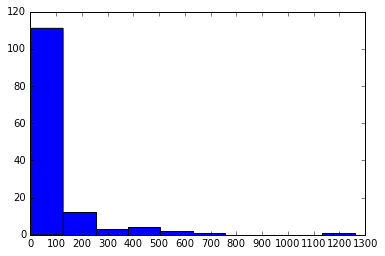

In [10]:
##Distribution of the existing time of BNS nad NSBH in the models
IDS, Pr, Tp=ns.BNS_NSBH_Appearperiod('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/BNS-NSBH.dat'\
                                     ,'/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/path_newmodel.dat')

for i in range(len(IDS)):
    if Pr[i]>100.: print Pr[i], IDS[i], Tp[i]

plt.figure()
plt.hist(Pr)
plt.xlim(0, 1300)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))
plt.show()


-1.61948e-26 2.83963e-10 6.616355e-13


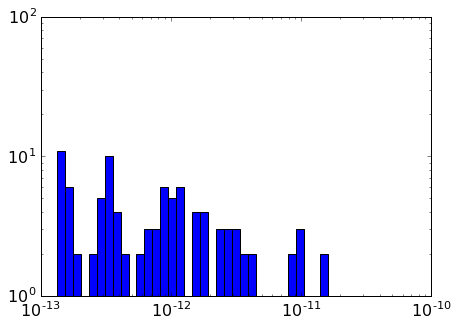

In [47]:
##Distribution of the mass transfer rate of MSPs
datamsp=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/kickgrid_msp_newmodel_new.dat')
id1=datamsp[:,2]
dmdt0=datamsp[:,9]

DMT=[]
for i in range(len(id1)):
    if id1[i]!=-100: DMT.append(dmdt0[i])
        
plt.figure()
plt.hist(DMT, bins=np.logspace(np.log10(1*10**-13),np.log10(10**-10), 50),log=True)
plt.xscale('log')

print min(DMT), max(DMT), np.median(DMT)

(array([ 11.,  13.,   4.,   7.,   0.,   0.,   0.,   0.,   0.,   6.]),
 array([  2.484    ,   6.5126646,  10.5413292,  14.5699938,  18.5986584,
         22.627323 ,  26.6559876,  30.6846522,  34.7133168,  38.7419814,
         42.770646 ]),
 <a list of 10 Patch objects>)

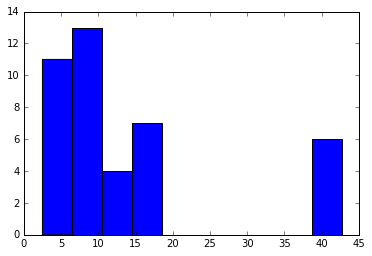

In [2]:
data=np.genfromtxt('/projects/b1011/syr904/projects/PULSAR/kickgrid_runs/paper/data/DNS_NSBH_Unique.dat')
m0=np.array(data[:,8]); m1=np.array(data[:,9]); types=np.array(data[:,12])

M=[]
for i in range(len(types)):
    if int(types[i])==1314: M.append(m1[i])
    if int(types[i])==1413: M.append(m0[i])
        
plt.figure()
plt.hist(M)
